In [47]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator
import pathlib

# Use Seaborn's style
sns.set(style="whitegrid")

def running_mean(x, window_size):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[window_size:] - cumsum[:-window_size]) / float(window_size)

def running_std(x, window_size):
    std = []
    for i in range(len(x) - window_size + 1):
        std.append(np.std(x[i:i+window_size]))
    return np.array(std)

def plot_results(env_name, algorithm, experiment_number, window_size=10):
    
    parent_directory = pathlib.Path().absolute().parent
    # join the path with the join function
    path = parent_directory.joinpath(f'{algorithm}/checkpoints/{env_name}/')
    # Load data
    with open(path.joinpath(f'{experiment_number}_rewards.pkl'), 'rb') as f:
        rewards = pickle.load(f)
    
    with open(path.joinpath(f'{experiment_number}_losses.pkl'), 'rb') as f:
        losses = pickle.load(f)

    rewards = np.array(rewards)
    critic_loss = np.array(losses['critic'])
    actor_loss = np.array(losses['actor'])
    size = 0
    temperature_loss = None
    if losses.get('temperature') is not None:
        temperature_loss = np.array(losses['temperature'])
        size = 4
    else:
        size = 3
    
    # Calculate smoothed data
    rewards_rm = running_mean(rewards, window_size)
    rewards_std = running_std(rewards, window_size)
    
    # Plotting
    fig, ax = plt.subplots(1, size, figsize=(5*size, 7))

    # Apply scientific notation
    for a in ax:
        a.ticklabel_format(style='scientific', axis='both', scilimits=(0,0))
        a.xaxis.set_major_locator(MaxNLocator(nbins=5))
        a.yaxis.set_major_locator(MaxNLocator(nbins=5))
        a.grid(True, which='both', linestyle='--', linewidth=0.6)  # Add gridlines
        a.tick_params(axis='both', which='major', labelsize=12)  # Adjust tick label size


    # Plot rewards using Seaborn
    sns.lineplot(x=np.arange(len(rewards_rm)), y=rewards_rm, ax=ax[0], color='blue', label='Average Return', linewidth=2)
    ax[0].fill_between(np.arange(len(rewards_rm)), rewards_rm - rewards_std, rewards_rm + rewards_std, color='blue', alpha=0.3)
    ax[0].set_title('Rewards', fontsize=14)
    ax[0].set_xlabel('Episodes', fontsize=12)
    ax[0].set_ylabel('Reward', fontsize=12)
    ax[0].legend(loc='upper left', fontsize=12)
    
    # Plot critic loss using Seaborn
    sns.lineplot(x=np.arange(len(critic_loss)), y=critic_loss, ax=ax[1], color='red', linewidth=2)
    ax[1].set_title('Critic Loss', fontsize=14)
    ax[1].set_xlabel('Steps', fontsize=12)
    ax[1].set_ylabel('Loss', fontsize=12)

    # Plot actor loss using Seaborn
    sns.lineplot(x=np.arange(len(actor_loss)), y=actor_loss, ax=ax[2], color='red', linewidth=2)
    ax[2].set_title('Actor Loss', fontsize=14)
    ax[2].set_xlabel('Steps', fontsize=12)
    ax[2].set_ylabel('Loss', fontsize=12)
    
    # Plot actor loss using Seaborn
    if temperature_loss is not None:
        sns.lineplot(x=np.arange(len(temperature_loss)), y=temperature_loss, ax=ax[3], color='red', linewidth=2)
        ax[3].set_title('Temperature Loss', fontsize=14)
        ax[3].set_xlabel('Steps', fontsize=12)
        ax[3].set_ylabel('Loss', fontsize=12)


    plt.tight_layout()
    plt.show()


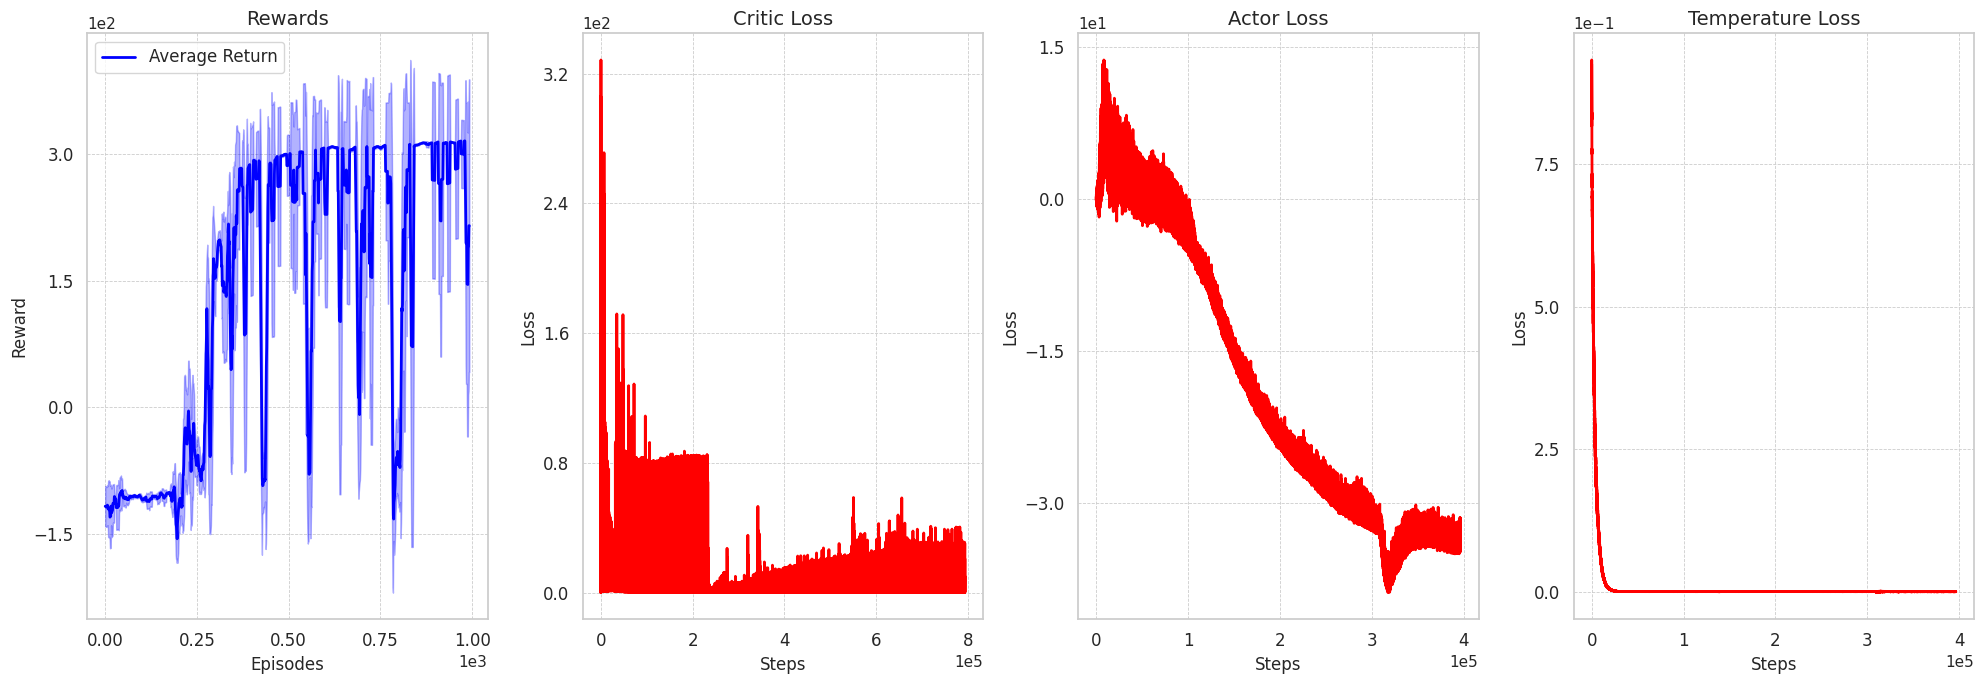

In [48]:
plot_results(env_name='BipedalWalker-v3', algorithm='SAC', experiment_number='08', window_size=8)